In [257]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [258]:
# Transform the date column to a datetime object
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [259]:
# Feature engineer the date column
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [260]:
# Create a data frame that only has thefts set to 0
df_0 = df[df['thefts'] == 0]

# Create a data frame where thefts are not 0
df_not_0 = df[df['thefts'] != 0]

# Create a dataframe merging df_not_0 and part of df_0
df_0 = df_0.sample(frac=0.4)
df = pd.concat([df_not_0, df_0])

# Sort the dataframe by date
df = df.sort_values(by=['Elapsed'])

df[:40]

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
86,86,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
44,44,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
107,107,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
7,7,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
149,149,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
14,14,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
117,117,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
10,10,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
49,49,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
135,135,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [261]:
# Split the data into train and validation sets where the end of the set is the validation set
splits = EndSplitter(valid_pct=0.4, valid_last=True)(range_of(df))

# Create a TabularPandas object
tabular_pandas = TabularPandas(
    df, procs=[Categorify, FillMissing, Normalize],
    cat_names=['hood_id', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
               'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
    cont_names=[],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
86,87,1,1,1,1,4,1,1,2,1,2,1,2
44,45,1,1,1,1,4,1,1,2,1,2,1,2
107,108,1,1,1,1,4,1,1,2,1,2,1,2
7,8,1,1,1,1,4,1,1,2,1,2,1,2
149,150,1,1,1,1,4,1,1,2,1,2,1,2


In [262]:
# Set the batch size
data_loader = tabular_pandas.dataloaders(bs=500)
data_loader.show_batch()

/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:284: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts*self.stds ) + self.means


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts
0,84,2016,4,13,2,5,93,False,False,False,False,False,False,0
1,149,2017,2,7,16,3,47,False,False,False,False,False,False,0
2,13,2016,11,48,28,0,333,False,False,False,False,False,False,0
3,49,2018,10,40,1,0,274,False,True,False,True,False,False,0
4,41,2017,10,44,31,1,304,True,False,False,False,False,False,0
5,34,2015,11,45,3,1,307,False,False,False,False,False,False,1
6,109,2018,9,39,28,4,271,False,False,False,False,False,False,1
7,99,2016,12,50,15,3,350,False,False,False,False,False,False,0
8,94,2017,1,3,20,4,20,False,False,False,False,False,False,1
9,26,2015,2,8,21,5,52,False,False,False,False,False,False,0


In [269]:
# Create a model with cross entropy loss
learn = tabular_learner(data_loader, metrics=accuracy,
                        y_range=(0, 3), loss_func=CrossEntropyLossFlat())


In [270]:
# Train the model
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,accuracy,time
0,1.093143,0.990479,0.714879,00:09
1,0.815169,0.844243,0.714879,00:08
2,0.792551,0.841383,0.714855,00:08
3,0.787966,0.842630,0.714710,00:09


In [271]:
# Show the results
learn.show_results(max_n=50)


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts,thefts_pred
0,78,0,8,32,9,1,221,1,1,1,1,1,1,1,1
1,13,0,12,52,31,5,365,2,1,2,1,2,1,1,0
2,105,5,7,29,20,6,201,1,1,1,1,1,1,0,0
3,22,5,12,49,8,7,342,1,1,1,1,1,1,1,0
4,42,0,6,26,23,2,175,1,1,1,1,1,1,0,0
5,43,0,6,26,22,1,174,1,1,1,1,1,1,0,0
6,156,0,11,45,13,6,317,1,1,1,1,1,1,0,0
7,60,5,8,35,31,6,243,2,1,1,1,1,1,1,0
8,73,0,8,33,18,3,230,1,1,1,1,1,1,0,0
9,32,0,7,26,4,7,185,1,1,1,1,1,1,1,0


In [272]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[0.6364, 0.2301, 0.0366, 0.0324, 0.0323, 0.0322],
        [0.5628, 0.3138, 0.0374, 0.0287, 0.0287, 0.0286],
        [0.6599, 0.2027, 0.0364, 0.0337, 0.0336, 0.0336],
        ...,
        [0.5592, 0.3254, 0.0306, 0.0283, 0.0282, 0.0282],
        [0.5991, 0.2783, 0.0321, 0.0303, 0.0302, 0.0301],
        [0.0866, 0.5632, 0.0895, 0.0870, 0.0868, 0.0869]])
tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int8)


In [273]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([0, 0, 0,  ..., 0, 0, 1])


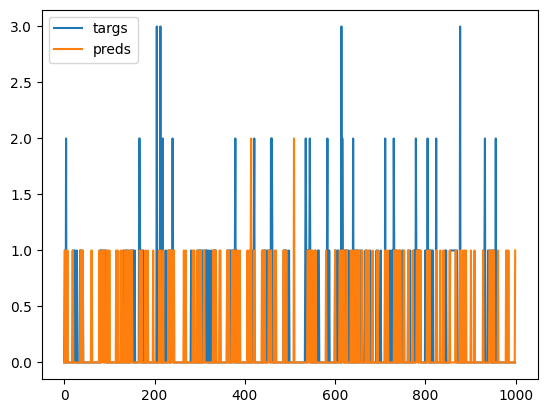

In [274]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [275]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.34620880052309105
Accuracy:  0.7147095149298912
